# The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)<br>
Data fetching and understand the train/val/test splits. (5 points)<br>
Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points)<br>
Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross-entropy loss, cost functions) (10 points)<br>
Implement batch normalization for training the neural network (5 points)<br>
Print the classification accuracy metrics (5 points)<br>

In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

Groups work like dictionaries, and datasets work like NumPy arrays

In [2]:
df = h5py.File('SVHN_single_grey1-2.h5', 'r+')

In [3]:
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [4]:
df['X_train'].shape,df['X_test'].shape,df['X_val'].shape

((42000, 32, 32), (18000, 32, 32), (60000, 32, 32))

In [5]:
X_train=np.array(df.get('X_train'))
X_test=np.array(df.get('X_test'))
X_val=np.array(df.get('X_val'))
y_train=np.array(df.get('y_train'))
ytest=np.array(df.get('y_test'))
y_val=np.array(df.get('y_val'))

In [6]:
X_train

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

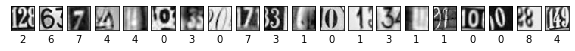

In [7]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(1,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [8]:
X_train=X_train.reshape(X_train.shape[0],1024).astype('float32')
X_test=X_test.reshape(X_test.shape[0],1024).astype('float32')
X_val=X_val.reshape(X_val.shape[0],1024).astype('float32')

In [9]:
y_train.shape

(42000,)

In [10]:
L=pd.DataFrame(y_train)
L[0].value_counts()

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
Name: 0, dtype: int64

In [11]:
#Encoding the output class label (One-Hot Encoding)
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(ytest,10)
y_val=tf.keras.utils.to_categorical(y_val,10)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
X_train.shape,y_train.shape

((42000, 1024), (42000, 10))

In [13]:
# Data Normalization
X_train/=255
X_val/=255
X_test/=255

# Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points)

In [14]:
# Define model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First input layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024
model.add(Dense(2048, activation='relu'))                # adding hidden Layer 1
model.add(Dense(512, activation='relu'))                # adding hidden Layer 2
model.add(Dense(256, activation='relu'))                # adding hidden Layer 3
model.add(Dense(128, activation='relu'))                # adding hidden Layer 4
model.add(Dense(64, activation='relu'))                # adding hidden Layer 5
model.add(Dense(10, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                6

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy',
#             optimizer='rmsprop',
#             metrics=['accuracy'])

In [16]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='/tmp/mnist/dnn_v1',profile_batch = 100000000)
history=model.fit(X_train, y_train ,batch_size=256,epochs=65,verbose=1,validation_data=(X_val, y_val),callbacks=[tensorboard])
model.save('/tmp/mnist/v5.h5')

Train on 42000 samples, validate on 60000 samples
Epoch 1/65
42000/42000 [==============================] - 19s 451us/sample - loss: 2.2982 - accuracy: 0.1102 - val_loss: 2.2903 - val_accuracy: 0.1116
Epoch 2/65
42000/42000 [==============================] - 20s 475us/sample - loss: 1.9461 - accuracy: 0.2656 - val_loss: 1.6236 - val_accuracy: 0.4207
Epoch 3/65
42000/42000 [==============================] - 19s 463us/sample - loss: 1.5335 - accuracy: 0.4628 - val_loss: 1.5369 - val_accuracy: 0.4596
Epoch 4/65
42000/42000 [==============================] - 20s 466us/sample - loss: 1.3341 - accuracy: 0.5480 - val_loss: 1.4182 - val_accuracy: 0.5213
Epoch 5/65
42000/42000 [==============================] - 19s 457us/sample - loss: 1.2227 - accuracy: 0.5950 - val_loss: 1.3158 - val_accuracy: 0.5662
Epoch 6/65
42000/42000 [==============================] - 20s 467us/sample - loss: 1.1092 - accuracy: 0.6393 - val_loss: 1.4671 - val_accuracy: 0.5280
Epoch 7/65
42000/42000 [====================

42000/42000 [==============================] - 23s 540us/sample - loss: 0.1544 - accuracy: 0.9473 - val_loss: 0.4035 - val_accuracy: 0.9086
Epoch 55/65
42000/42000 [==============================] - 24s 563us/sample - loss: 0.1843 - accuracy: 0.9377 - val_loss: 0.4616 - val_accuracy: 0.8841
Epoch 56/65
42000/42000 [==============================] - 23s 559us/sample - loss: 0.1804 - accuracy: 0.9391 - val_loss: 0.6275 - val_accuracy: 0.8471
Epoch 57/65
42000/42000 [==============================] - 22s 527us/sample - loss: 0.2040 - accuracy: 0.9327 - val_loss: 0.3891 - val_accuracy: 0.9118
Epoch 58/65
42000/42000 [==============================] - 21s 511us/sample - loss: 0.1285 - accuracy: 0.9561 - val_loss: 0.5112 - val_accuracy: 0.8808
Epoch 59/65
42000/42000 [==============================] - 22s 531us/sample - loss: 0.2053 - accuracy: 0.9312 - val_loss: 0.4472 - val_accuracy: 0.8957
Epoch 60/65
42000/42000 [==============================] - 22s 524us/sample - loss: 0.1286 - accurac

In [17]:
val_accuracy  = model.evaluate(X_val, y_val, verbose=False)

In [18]:
print('\n', 'Validation accuracy:', val_accuracy[1])


 Validation accuracy: 0.92866665


In [19]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8157778


In [32]:
from sklearn import metrics
predictions = model.predict(X_test)
y_pred = []
for val in predictions:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)
cr=metrics.classification_report(ytest,y_pred)
print(cr)

[[1538   35   13   20   35   20   39   25   41   48]
 [  21 1497   25   48   75   19   31   38   51   23]
 [  21   27 1496   43   41   15   19   67   31   43]
 [  15   32   44 1356   23  119   28   33   42   27]
 [  18   32   34   27 1555   22   37   15   37   35]
 [  16   26   18  113   16 1395   70    4   73   37]
 [  37   23   22   24   42   75 1512    9   74   14]
 [  25   84   78   41   18   19   12 1486   15   30]
 [  25   36   19   45   41   57   93   10 1435   51]
 [  45   36   26   47   35   75   20   26   80 1414]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1814
           1       0.82      0.82      0.82      1828
           2       0.84      0.83      0.84      1803
           3       0.77      0.79      0.78      1719
           4       0.83      0.86      0.84      1812
           5       0.77      0.79      0.78      1768
           6       0.81      0.83      0.82      1832
           7       0.87      0.82   

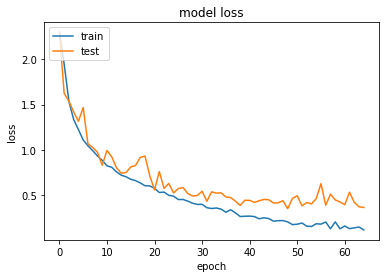

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

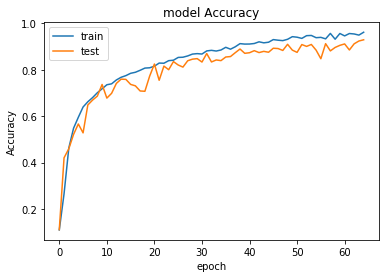

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross-entropy loss, cost functions) (10 points)


In [44]:
# Define model architecture
model1 = Sequential()
model1.add(Dense(1024, activation='relu', input_shape=(1024,)))   #First input layer of 1024  neurons, each neuron takes input 
                                                               # vector of size 1024
model1.add(Dense(2048, activation='relu'))                # adding hidden Layer 1
model1.add(Dense(512, activation='relu'))                # adding hidden Layer 2
model1.add(Dense(256, activation='relu'))                # adding hidden Layer 3
model1.add(Dense(128, activation='relu'))                # adding hidden Layer 4
model1.add(Dense(64, activation='relu'))                # adding hidden Layer 5
model1.add(Dense(10, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        
print (model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_22 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_23 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

In [45]:
sgd = tf.keras.optimizers.Adam(learning_rate=0.001,decay=1e-6)
model1.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy',
#             optimizer='rmsprop',
#             metrics=['accuracy'])

In [46]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='/tmp/mnist/dnn_v1',profile_batch = 100000000)
history1=model1.fit(X_train, y_train ,batch_size=420,epochs=65,verbose=1,validation_data=(X_val, y_val),callbacks=[tensorboard])
model1.save('/tmp/mnist/v6.h5') 

Train on 42000 samples, validate on 60000 samples
Epoch 1/65
42000/42000 [==============================] - 17s 408us/sample - loss: 2.2690 - accuracy: 0.1301 - val_loss: 2.0515 - val_accuracy: 0.1945
Epoch 2/65
42000/42000 [==============================] - 19s 456us/sample - loss: 1.7946 - accuracy: 0.3384 - val_loss: 1.5967 - val_accuracy: 0.4275
Epoch 3/65
42000/42000 [==============================] - 19s 464us/sample - loss: 1.4318 - accuracy: 0.5063 - val_loss: 1.2759 - val_accuracy: 0.5723
Epoch 4/65
42000/42000 [==============================] - 19s 445us/sample - loss: 1.2724 - accuracy: 0.5719 - val_loss: 1.2390 - val_accuracy: 0.5806
Epoch 5/65
42000/42000 [==============================] - 18s 437us/sample - loss: 1.1891 - accuracy: 0.6075 - val_loss: 1.1166 - val_accuracy: 0.6387
Epoch 6/65
42000/42000 [==============================] - 18s 419us/sample - loss: 1.0682 - accuracy: 0.6531 - val_loss: 1.0634 - val_accuracy: 0.6540
Epoch 7/65
42000/42000 [====================

42000/42000 [==============================] - 16s 387us/sample - loss: 0.1410 - accuracy: 0.9521 - val_loss: 0.3743 - val_accuracy: 0.9123
Epoch 55/65
42000/42000 [==============================] - 16s 380us/sample - loss: 0.1199 - accuracy: 0.9593 - val_loss: 0.3538 - val_accuracy: 0.9224
Epoch 56/65
42000/42000 [==============================] - 16s 381us/sample - loss: 0.1090 - accuracy: 0.9625 - val_loss: 0.3781 - val_accuracy: 0.9173
Epoch 57/65
42000/42000 [==============================] - 16s 381us/sample - loss: 0.1156 - accuracy: 0.9600 - val_loss: 0.3856 - val_accuracy: 0.9199
Epoch 58/65
42000/42000 [==============================] - 16s 384us/sample - loss: 0.1413 - accuracy: 0.9532 - val_loss: 0.4050 - val_accuracy: 0.9071
Epoch 59/65
42000/42000 [==============================] - 16s 383us/sample - loss: 0.0963 - accuracy: 0.9682 - val_loss: 0.3534 - val_accuracy: 0.9300
Epoch 60/65
42000/42000 [==============================] - 16s 383us/sample - loss: 0.1260 - accurac

In [47]:
val_accuracy1  = model.evaluate(X_val, y_val, verbose=False)

In [48]:
print('\n', 'Validation accuracy:', val_accuracy1[1])


 Validation accuracy: 0.92866665


In [49]:
# Evaluate the model on test set
score1 = model1.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score1[1])


 Test accuracy: 0.82827777


In [50]:
from sklearn import metrics
predictions = model1.predict(X_test)
y_pred = []
for val in predictions:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)
cr=metrics.classification_report(ytest,y_pred)
print(cr)

[[1530   36    6   26   26   18   47   36   22   67]
 [  26 1539   17   43   44   15   27   68   20   29]
 [  14   37 1447   61   26   28   17  122   23   28]
 [  12   36   18 1382   12  131   21   49   29   29]
 [  17   43   24   29 1566   20   38   22   18   35]
 [  14   25    9   86    9 1480   52   16   47   30]
 [  32   25   10   29   22   89 1519   29   57   20]
 [  13   43   32   25   14    6    6 1640    9   20]
 [  28   37   18   61   21   67  127   27 1373   53]
 [  47   38   16   57   18   80   24   41   50 1433]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1814
           1       0.83      0.84      0.83      1828
           2       0.91      0.80      0.85      1803
           3       0.77      0.80      0.79      1719
           4       0.89      0.86      0.88      1812
           5       0.77      0.84      0.80      1768
           6       0.81      0.83      0.82      1832
           7       0.80      0.91   

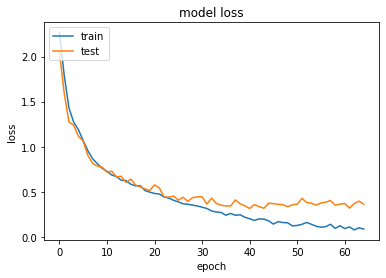

In [51]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

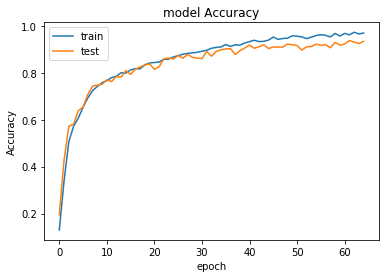

In [52]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Implement batch normalization for training the neural network (5 points)

In [99]:
# Define model architecture
from tensorflow.keras.constraints import max_norm
model2 = Sequential()

wt_init=tf.keras.initializers.he_normal(seed=None)

model2.add(Dense(1024, activation='relu', input_shape=(1024,),kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))   #First input layer of 1024  neurons, each neuron takes input 
# vector of size 1024
model2.add(BatchNormalization())  
model2.add(Dense(2048, activation='relu',kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))                # adding hidden Layer 1
model2.add(BatchNormalization())                          # adding BatchNormalization
model2.add(Dropout(0.2)) 
model2.add(Dense(512, activation='relu',kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))                # adding hidden Layer 2
model2.add(BatchNormalization())                          # adding BatchNormalization
model2.add(Dropout(0.2)) 
model2.add(Dense(256, activation='relu',kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))                # adding hidden Layer 3
model2.add(BatchNormalization())                          # adding BatchNormalization
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu',kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))                # adding hidden Layer 4
model2.add(BatchNormalization())                          # adding BatchNormalization
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu',kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))                # adding hidden Layer 5
model2.add(BatchNormalization())                          # adding BatchNormalization
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu',kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))                # adding hidden Layer 5
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu',kernel_initializer = wt_init, kernel_constraint = max_norm(2) ))                # adding hidden Layer 5
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))            # Adding a softmax layer for output  
        
        
print (model2.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_60 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_103 (Dense)            (None, 2048)              2099200   
_________________________________________________________________
batch_normalization_61 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_27 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 512)               1049088   
_________________________________________________________________
batch_normalization_62 (Batc (None, 512)             

In [100]:
sgd = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=1e-6)
model2.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy',
#             optimizer='rmsprop',
#             metrics=['accuracy'])

In [101]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='/tmp/mnist/dnn_v1',profile_batch = 100000000)
history2=model2.fit(X_train, y_train ,batch_size=512,epochs=100,verbose=1,validation_data=(X_val, y_val),callbacks=[tensorboard])
model2.save('/tmp/mnist/v7.h5')

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 24s 561us/sample - loss: 2.5962 - accuracy: 0.1296 - val_loss: 2.3260 - val_accuracy: 0.1416
Epoch 2/100
42000/42000 [==============================] - 23s 547us/sample - loss: 2.2290 - accuracy: 0.2011 - val_loss: 2.0206 - val_accuracy: 0.2888
Epoch 3/100
42000/42000 [==============================] - 24s 576us/sample - loss: 1.9630 - accuracy: 0.2963 - val_loss: 1.7401 - val_accuracy: 0.4221
Epoch 4/100
42000/42000 [==============================] - 25s 591us/sample - loss: 1.7575 - accuracy: 0.3894 - val_loss: 1.5787 - val_accuracy: 0.4629
Epoch 5/100
42000/42000 [==============================] - 23s 544us/sample - loss: 1.6118 - accuracy: 0.4549 - val_loss: 1.6134 - val_accuracy: 0.4617
Epoch 6/100
42000/42000 [==============================] - 24s 560us/sample - loss: 1.4547 - accuracy: 0.5180 - val_loss: 1.6443 - val_accuracy: 0.4428
Epoch 7/100
42000/42000 [=============

42000/42000 [==============================] - 25s 599us/sample - loss: 0.4686 - accuracy: 0.8725 - val_loss: 0.5269 - val_accuracy: 0.8476
Epoch 55/100
42000/42000 [==============================] - 24s 574us/sample - loss: 0.4300 - accuracy: 0.8810 - val_loss: 0.6726 - val_accuracy: 0.8092
Epoch 56/100
42000/42000 [==============================] - 24s 581us/sample - loss: 0.4824 - accuracy: 0.8660 - val_loss: 0.6357 - val_accuracy: 0.8172
Epoch 57/100
42000/42000 [==============================] - 24s 565us/sample - loss: 0.4324 - accuracy: 0.8803 - val_loss: 0.8934 - val_accuracy: 0.7428
Epoch 58/100
42000/42000 [==============================] - 24s 563us/sample - loss: 0.5100 - accuracy: 0.8567 - val_loss: 0.6950 - val_accuracy: 0.7982
Epoch 59/100
42000/42000 [==============================] - 24s 566us/sample - loss: 0.4546 - accuracy: 0.8739 - val_loss: 0.8758 - val_accuracy: 0.7451
Epoch 60/100
42000/42000 [==============================] - 24s 566us/sample - loss: 0.5251 - a

In [102]:
val_accuracy2  = model2.evaluate(X_val, y_val, verbose=False)

In [103]:
print('\n', 'Validation accuracy:', val_accuracy2[1])


 Validation accuracy: 0.88691664


In [104]:
# Evaluate the model on test set
score2 = model2.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score2[1])


 Test accuracy: 0.83194447


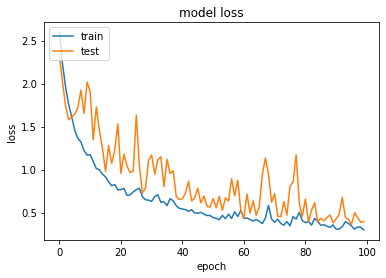

In [105]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

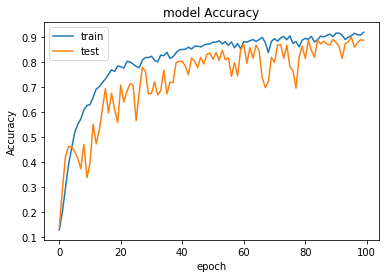

In [106]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Print the classification accuracy metrics (5 points)

In [107]:
from sklearn import metrics
predictions = model2.predict(X_test)
y_pred = []
for val in predictions:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)
cr=metrics.classification_report(ytest,y_pred)
print(cr)

[[1549   33   42   24   18    7   26   17   44   54]
 [  22 1548   51   49   45    8   22   27   46   10]
 [  15   16 1620   25   22   10    5   37   25   28]
 [  11   31   51 1397   14   88   21   22   63   21]
 [  23   51   47   37 1529   12   25   11   52   25]
 [  14   16   23  126   10 1415   54   14   67   29]
 [  38   16   25   25   30   76 1448    7  146   21]
 [  19   57  110   25   11    5   11 1548    8   14]
 [  21   28   58   70   15   28   80   11 1466   35]
 [  64   26   67   55   20   27    7   27   56 1455]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1814
           1       0.85      0.85      0.85      1828
           2       0.77      0.90      0.83      1803
           3       0.76      0.81      0.79      1719
           4       0.89      0.84      0.87      1812
           5       0.84      0.80      0.82      1768
           6       0.85      0.79      0.82      1832
           7       0.90      0.86   